# Computer Vision - P3

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 30th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

1)	Segmentation of video shots with static scenes.

2) Background substraction.

3)	Segmentation of images.

In order to successfuly complete this practicum it is necessary to understand the following theory concepts: background substraction, K-means clustering, etc.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.

## 3.1 Background substraction methods


Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, remove all the "artifacts" considered as foreground related to movement extracting the background images.

Note: One of the applications of these methods is the button "remove tourists" implemented in most commercial photo cameras. For instance, Adobe uses the "Monument Mode", which automatically deletes the people going by the cameras.

Read and visualize the sequence of images "images/Barcelona-sequence"
Hint: In order to read a  collection of images, we wil use the function animation.FuncAnimation [https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html].

Observe in the following example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

<IPython.core.display.Javascript object>


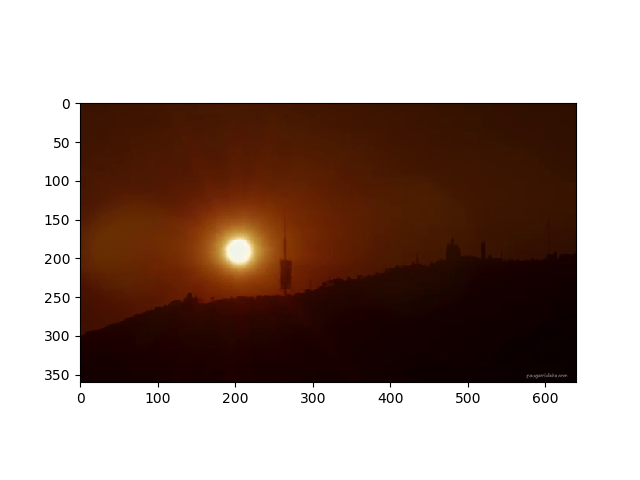

In [2]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
from skimage import color

ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder

import matplotlib.animation as animation
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(ic[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i]) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=290, repeat= True)

(2 points) a) Find where a shot (scene) finishes and the following starts (boundaries). Each of the scenes in a video is usually called 'shot'. 

To solve this exercise, you need to create a **temporal plot** showing a frame by frame measure to be defined by you, being applicable to distinguish the shots. 

Execute the following code in "Example A". This created **temporal plot** should replace the temporal plot given as a template. 


**Hint:**
- If you need to convert the image to float, the command is: img_as_float()

- If you need the histogram, it is in skimage.exposure


<IPython.core.display.Javascript object>


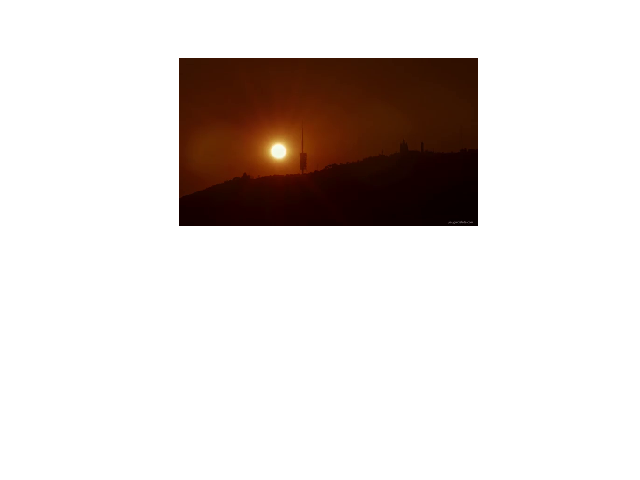

In [3]:
# Example A
# Sinusoidal plot points generation
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y = np.cos(2*np.pi*t) * np.exp(-t/10.)
        # adapted the data generator to yield both sin and cos
        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-1.1, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

<IPython.core.display.Javascript object>


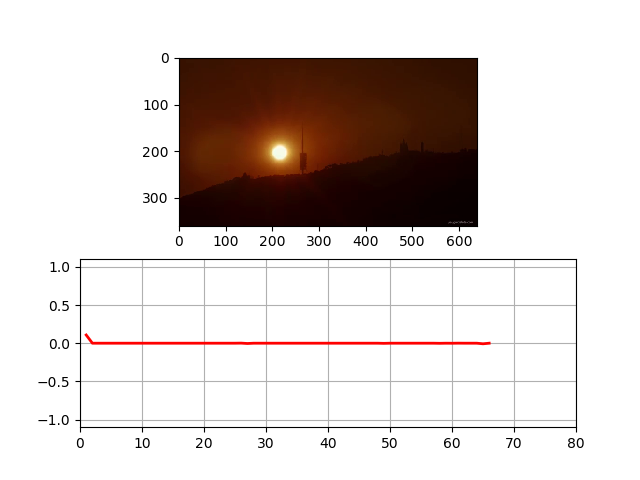

In [5]:
from skimage import color

def data_gen():
    """
    Generator that will return the mean difference
    between the current and previous frames
    """
    t = data_gen.t
    
    cnt = 1
    while cnt < len(ic):
        
        # Obtain current frame and transform into float grayscale image
        current_frame = color.rgb2gray(skimage.img_as_float(ic[cnt]))
        
        # Obtain last frame and transform into float grayscale image.
        # In case it's the first frame, compare against a black frame
        previous_frame = color.rgb2gray(skimage.img_as_float(ic[cnt - 1])) if t is not 0 else np.zeros(current_frame.shape)

        # Substract previous frame from current frame to get matrix of
        # change. This can be interpreted as the derivative of each pixel
        # relative to time.
        diff = current_frame - previous_frame
        
        # Find the mean of the differences matrix.
        y = np.mean(diff)

        cnt += 1
        t += 1
        
        yield t, diff[0,0]

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-1.1, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot function in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=30, repeat=False)
plt.show()

(0.5 points) b) Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">


<IPython.core.display.Javascript object>


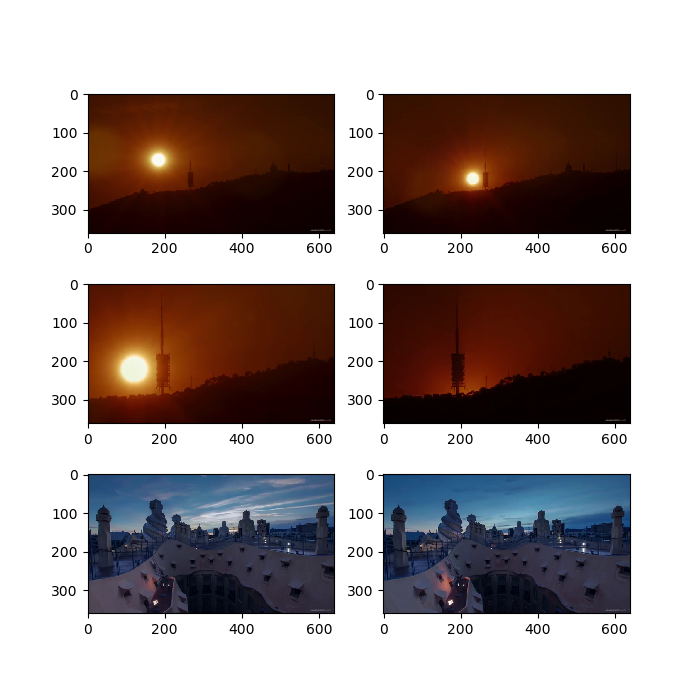

In [6]:
# Get list of frame differences
difference_means = list(data_gen())

threshold = .01

# Get list of cut frames
cuts = []
for shot in difference_means:
    
    # If the median difference is considerable,
    # treat as new shot.
    if shot[1] > threshold:
        cuts.append(shot[0])

# Generate list of short start and end frames
# in the form (cut frame, frame before next cut)
shots = []
i = 0
while i < len(cuts) - 1:
    c = cuts[i]
    shots.append((cuts[i], cuts[i + 1] - 1))
    i += 1

# Show frames
f, axarr = plt.subplots(ncols=2, nrows=len(shots),figsize=(7,7))

i = 0
for s in shots:
    start, end = s
    axarr[i, 0].imshow(ic[start])
    axarr[i, 1].imshow(ic[end])
    i += 1

plt.show()

(0.5 points) c) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

Our approach has been to define a function which returns **the difference matrix between a frame and its predecessor**. This can be interpreted as the "derivative" over time of the animation, as it displays the change between a frame and the next. The value at each position in the matrix is the change for each individual pixel. 

From this function, **we take the median value at each frame**. A higher mean value will mean that more pixels have changed dramatically, while a lower mean value will mean that less pixels have changed less significantly.

In order to detect shot cuts, **we need to find the frames where these changes are considerably steep**. For this matter, we have defined a threshold at which higher values can be safely considered scene changes. Note that, during the normal progression of a shot, the median at the majority of frames is 0 or very close to 0. For that reason, we have defined the threshold as .01

## 3.2 Background substraction

(2) a) Apply the background substraction algorithm (check theory material).

Visualize, for each different scene (there are 3) of the video:

    1) images belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

<IPython.core.display.Javascript object>


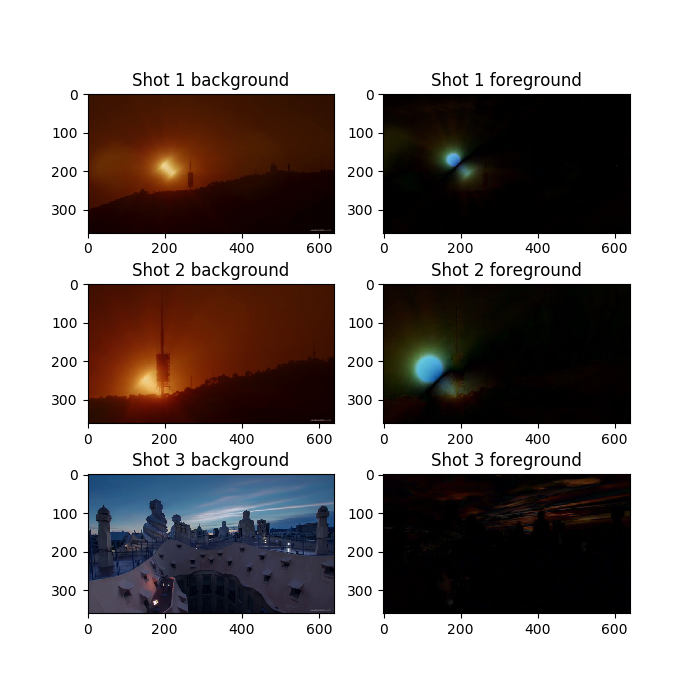

In [38]:
shot1 = ic[shots[0][0]:shots[0][1]]
shot2 = ic[shots[1][0]:shots[1][1]]
shot3 = ic[shots[2][0]:shots[2][1]]

def get_median_frame(shot):
    
    median_matrix = np.median(skimage.img_as_float(shot), axis=0)
    return median_matrix
    
#shot1_background = get_median_frame(shot1)
#shot2_background = get_median_frame(shot2)
#shot3_background = get_median_frame(shot3)

shot1_foreground = [abs(skimage.img_as_float(frame) - shot1_background) for frame in shot1]
#shot2_foreground = [abs(skimage.img_as_float(frame) - shot2_background) for frame in shot2]
#shot3_foreground = [abs(skimage.img_as_float(frame) - shot3_background) for frame in shot3]

# Show frames
f, axarr = plt.subplots(ncols=2, nrows=3,figsize=(7,7))

axarr[0, 0].imshow(shot1_background)
axarr[0, 0].set_title("Shot 1 background")
axarr[0, 1].imshow(shot1_foreground[0])
axarr[0, 1].set_title("Shot 1 foreground")

axarr[1, 0].imshow(shot2_background)
axarr[1, 0].set_title("Shot 2 background")
axarr[1, 1].imshow(shot2_foreground[0])
axarr[1, 1].set_title("Shot 2 foreground")

axarr[2, 0].imshow(shot3_background)
axarr[2, 0].set_title("Shot 3 background")
axarr[2, 1].imshow(shot3_foreground[0])
axarr[2, 1].set_title("Shot 3 foreground")

plt.show()

(0.2 points) - What happens if the shots are not correctly extracted? 



In case the shots were not correctly extracted, **frames from another shot could be incorrectly rendered into the array of frames for the correct shot**. The mean of the shot, therefore, would be meaningless, and the background extraction would be incorrect.

(0.2 points) - What happens if you find too many shots in the video? 

If the video was segmented into too many shots, **we'd have too few frames from which to calculate a relevant mean**, therefore our extracted background would be too similar to each given frame in the sequence. This would make it very difficult to tell the foreground elements apart from the background.

(0.3 points) - What do the static background images represent? 

The static background image of an animation represents **the most common image rendered over time in an animation**. This is useful when considering the foreground elements as the 'moving' parts of an animation, and the background as the backdrop the action happens in. Or, in the case of a panning animation, we would be able to tell apart the foreground as it would move faster than the background due to the proximity to the viewer.

(0.2 points) - In which situations does the algorithm work and in which it does not? 


This algorithm works best **when we have a sufficient amount of frames to sample a background out of, and the foreground constitutes the moving elements of the animation while the background remains static**. As has already been mentioned, too few frames would make the mean frame too invariant, and the foreground would be hard to distinguish from the background - while a moving background or a static foreground wouldn't provide enough reference to tell one apart from the other.

(0.2 points) - What happens if you substract the background image from the original one?

Considering thet the background remains the same among all frames in the animation, **the resulting image, the difference between any frame and the background, constitutes the foreground**.

(0.2 points) - Do you see any additional application for this algorithm?

This algorithm can be applied to **all fields where it's useful to distinguish the moving parts of an animation and generate a background image accordingly**. A few situations come to mind: automatic driving, robotic manufacturing, cinematography, 3D rendering from 2D sources, etc.

(0.5) **[OPTIONAL]**
Apply the algorithm to some other static video that you found.

## 3.3 Clustering methods on the RGB-XY space

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline)

(0.3 points) a) Read any image from the folder 'images' and segment it using Felzenszwalbs's method. 


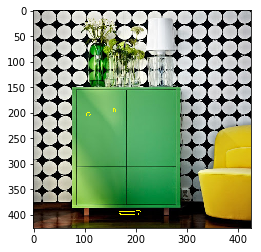

In [50]:
%matplotlib inline
from skimage import segmentation
img = io.imread('images/buffet.jpg')
felzenszwalb = segmentation.felzenszwalb(img)
felzenszwalb = segmentation.mark_boundaries(img, felzenszwalb)
plt.imshow(felzenszwalb)
plt.show()

(0.5 points) - Test different parameters in order to obtain a good image segmentation.  Which are the optimal values?

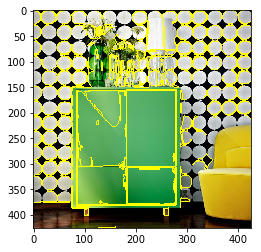

In [54]:
segments_felzenszwalb = segmentation.felzenszwalb(img, 200, 0.5, 20)
felzenszwalb = segmentation.mark_boundaries(img, segments_felzenszwalb)
plt.imshow(felzenszwalb)
plt.show()

(0.3 points) - How does each parameter behave?

scale: Observation level, the number and size of segments, a bigger number means less and larger segments
    
sigma : Diameter of a Gaussian kernel, for smoothing the image before segmentation

(0.2 points) - Comment what algorithm is the method based in up to 3 lines most.

**Felzenszwalb's algorithm creates a graph based on the image in order to separate it into sections.** In this graph, each pixel constitutes a vertex with edges connecting to its neighbors. Each edge is given a cost based on the dissimilarity between the connected pixels: the higher the dissimilarity, the higher the cost. Subsequently, the image is divided into sections with vertices with low traversal cost among them.

(0.3 points) b) Segment the previous image using SLIC algorithm. 

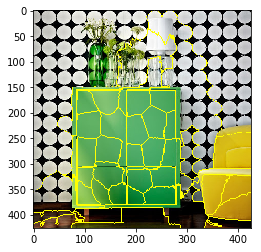

In [55]:
segments_slic = segmentation.slic(img)
slic = segmentation.mark_boundaries(img, segments_slic)
plt.imshow(slic)
plt.show()

(0.5 points) - Test different parameters in order to obtain a good image segmentation. Up to your opinion, which are the optimal values? 


In our consideration, the optimal parameters in this case are as defined below:

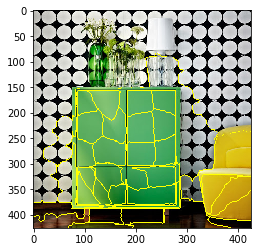

In [56]:
segments_slic = segmentation.slic(img, 100, 7.0, 10, 1)
slic = segmentation.mark_boundaries(img, segments_slic)
plt.imshow(slic)
plt.show()

(0.3 points) - How does each parameter behave? 


n_segments: number of labels in the output image, bigger number means more segments.

compactness: Balances color proximity and space proximity. Higher values give more weight to space proximity, with really high values it forms a lot of squares, with low values differentiates subtle changes in color.

sigma: if its bigger than 0 the image is smoothed using Gaussian kernel.

(0.2 points) - Comment what algorithm is the method based in up to 3 lines.

The algorithm used is k-means clustering, first randomly initializes the cluster centers.
Then determines points in each cluster, determines the nearest cluster to every point, and puts it in the cluster.
Finally the cluster center becomes the mean of the points it haves, repeat until the cluster doesnt change.

(0.3 points) c) Plot the original image and the results of both algorithms in a 1x3 subplot. 



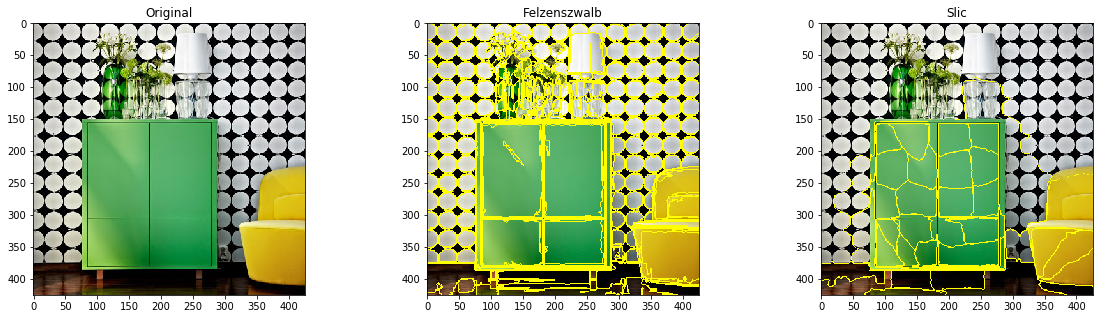

In [267]:
# Display images
f, axarr = plt.subplots(ncols=3, nrows=1,figsize=(20,5))

# Original
axarr[0].imshow(img)
axarr[0].set_title('Original')

# Felzenszwalb
axarr[1].imshow(felzenszwalb_marks)
axarr[1].set_title('Felzenszwalb')

# Slic
axarr[2].imshow(slic_marks)
axarr[2].set_title('Slic')

plt.show()

(0.4 points) d) Calculate also the number of segments obtained on the image by each of the algorithms. 

In [61]:
print ("N segments SLIC:", len(np.unique(segments_slic)))
print ("N segments Felzenszwalb:", len(np.unique(segments_felzenszwalb)))

N segments SLIC: 33
N segments Felzenszwalb: 509


(0.4 points) e) Comment the differences between each method as well as their advantages and disadvantages.

The **SLIC algorithm** (*Simple Linear Iterative Clustering*) works by defining an amount of clusters we want to divide the original image in, calculating the average area of a cluster (total pixels / number of clusters), the average distance between cluster centers and iterating on these values until finding borders that fulfill these requisites.

The **Felzenszwalb algorithm**, on the other hand, as has already been explained, works by defining a weighted graph in which weights are the amount of difference between pixels.